In [1]:
from init_nb import init_notebook
config = init_notebook()

from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
from nilearn import plotting
import nibabel as nib
import itertools
from bold_dementia.connectivity import (
    Atlas, group_by_networks, plot_matrix, reshape_pvalues, block_block, plot_ordered_matrix, pivot_resdf
)
from bold_dementia.utils.iterables import unique
import networkx as nx
from bold_dementia.visualisation.chord_plot import create_chord, make_links

ATLAS = "gillig-regions"
SOFT = False
ALPHA = config["alpha"]
atlas = Atlas.from_name(ATLAS, soft=SOFT)


In [2]:
expname = f"atlas-{ATLAS}_merged_ols-cenanom-block"
matrices_path = Path(
    f"{config['output_dir']}/statresults/{expname}"
)
resdf = pd.read_csv(matrices_path / "resdf.csv", index_col=0)
resdf_pv = pivot_resdf(resdf, alpha=ALPHA)

In [3]:
minidf = resdf.loc[:, ["node_a", "node_b", "thresholded_beta"]]
minidf = minidf.rename({"thresholded_beta": "weight"}, axis=1)

In [4]:
minidf[minidf.weight != 0]

,node_a,node_b,weight
0,RSN01,RSN01,-0.023240
46,RSN02,RSN10,0.011074
65,RSN11,RSN11,-0.018358
154,RSN02,RSN18,-0.013549
218,RSN09,RSN21,-0.011936
277,RSN02,RSN24,0.011663
280,RSN05,RSN24,-0.009389
281,RSN06,RSN24,-0.011674
282,RSN07,RSN24,-0.013495
354,RSN04,RSN27,0.010884


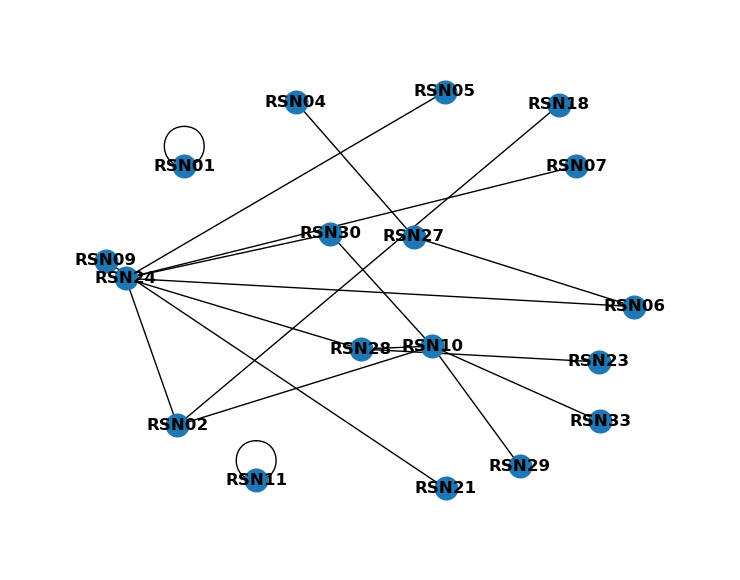

In [5]:
G = nx.from_pandas_edgelist(
    minidf[minidf.weight != 0],
    source="node_a",
    target="node_b",
    edge_attr="weight"
)

nx.draw(G, with_labels=True, font_weight='bold')

plt.show()



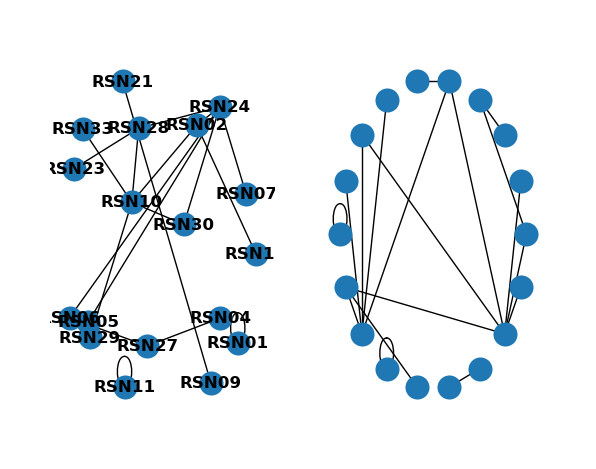

In [6]:
import matplotlib.pyplot as plt
subax1 = plt.subplot(121)

nx.draw(G, with_labels=True, font_weight='bold')

subax2 = plt.subplot(122)

nx.draw_shell(G)

In [7]:
matrix_df = resdf_pv["thresholded_beta"]
matrix_df.fillna(value=0, inplace=True)
labels = atlas.labels_

links = make_links(matrix_df)

RSN01 RSN01 -0.0232401076486625 0.232401076486625
RSN02 RSN10 0.0110737362235186 0.110737362235186
RSN02 RSN18 -0.0135489809281059 0.135489809281059
RSN02 RSN24 0.011663106209997 0.11663106209997
RSN04 RSN27 0.0108844054680438 0.108844054680438
RSN05 RSN24 -0.0093892829496091 0.093892829496091
RSN06 RSN24 -0.0116744176228724 0.116744176228724
RSN06 RSN27 0.011657327852661 0.11657327852661
RSN07 RSN24 -0.0134946325755313 0.13494632575531298
RSN09 RSN21 -0.0119355656484315 0.119355656484315
RSN10 RSN28 0.0110969321355467 0.110969321355467
RSN10 RSN29 0.0116929891729873 0.116929891729873
RSN10 RSN30 0.0135021234910392 0.135021234910392
RSN10 RSN33 0.0113849946200925 0.113849946200925
RSN11 RSN11 -0.0183584179789026 0.183584179789026
RSN23 RSN28 0.0123330725144143 0.123330725144143
RSN24 RSN28 0.0091409693707617 0.09140969370761699
RSN24 RSN30 0.0146787974737926 0.14678797473792599


/tmp/ipykernel_1675820/3292383927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_df.fillna(value=0, inplace=True)


In [8]:
links

[(('RSN01', 0, 0.232401076486625), ('RSN01', 9.767598923513376, 10), 'blue'),
 (('RSN02', 4.944631318882407, 5.055368681117593),
  ('RSN10', 4.944631318882407, 5.055368681117593),
  'red'),
 (('RSN02', 4.93225509535947, 5.06774490464053),
  ('RSN18', 4.93225509535947, 5.06774490464053),
  'blue'),
 (('RSN02', 4.941684468950015, 5.058315531049985),
  ('RSN24', 4.941684468950015, 5.058315531049985),
  'red'),
 (('RSN04', 4.945577972659781, 5.054422027340219),
  ('RSN27', 4.945577972659781, 5.054422027340219),
  'red'),
 (('RSN05', 4.953053585251954, 5.046946414748046),
  ('RSN24', 4.953053585251954, 5.046946414748046),
  'blue'),
 (('RSN06', 4.941627911885638, 5.058372088114362),
  ('RSN24', 4.941627911885638, 5.058372088114362),
  'blue'),
 (('RSN06', 4.941713360736695, 5.058286639263305),
  ('RSN27', 4.941713360736695, 5.058286639263305),
  'red'),
 (('RSN07', 4.932526837122343, 5.067473162877657),
  ('RSN24', 4.932526837122343, 5.067473162877657),
  'blue'),
 (('RSN09', 4.940322171757

Text(0.5, 1.01, 'atlas-gillig-regions_merged_ols-cenanom-block\nTresholded slopes ($\\alpha = $0.05, FDR corrected)')

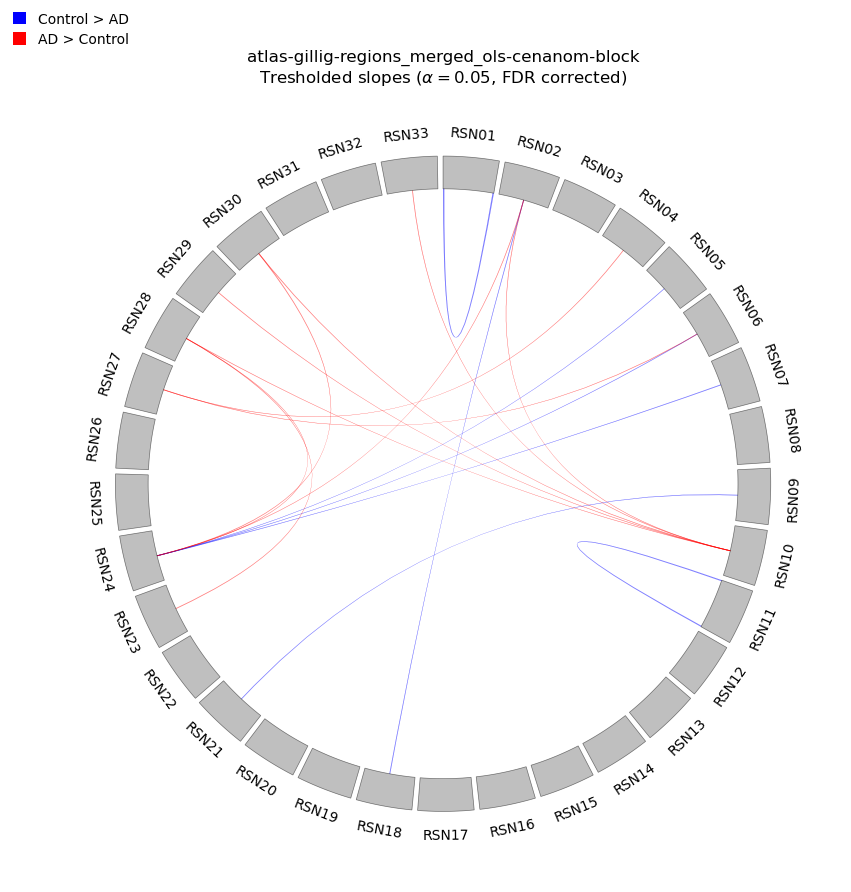

In [9]:
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='blue', label='Control > AD')
red_patch = mpatches.Patch(color='red', label='AD > Control')

networks = matrix_df.columns.to_list()
fig = create_chord(networks, links)
fig.legend(handles=[blue_patch, red_patch])
fig.suptitle(
    f"{expname}\nTresholded slopes ($\\alpha = ${ALPHA}, FDR corrected)",
    y=1.01
)

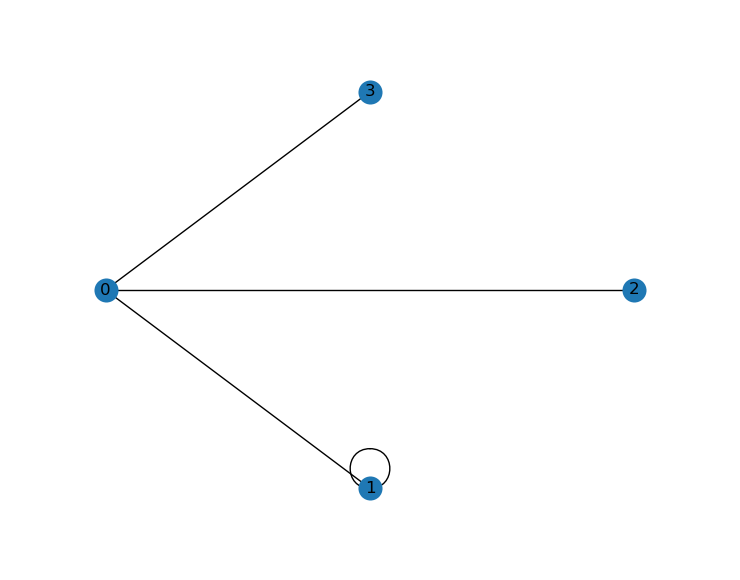

In [10]:
adjacency_dict = {0: (1, 2, 3), 1: (0, 1)}

H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs


nx.draw_shell(H, with_labels=True)